In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('/content/Train_Data.csv')
train_df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,Adult
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,Adult
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,Adult
3,73577.0,1.0,2.0,28.9,104.0,NaN,84.0,16.15,Adult
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,Adult


In [4]:
train_df.shape

(1966, 9)

In [6]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1966 entries, 0 to 1965
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SEQN       1954 non-null   float64
 1   RIAGENDR   1948 non-null   float64
 2   PAQ605     1953 non-null   float64
 3   BMXBMI     1948 non-null   float64
 4   LBXGLU     1953 non-null   float64
 5   DIQ010     1948 non-null   float64
 6   LBXGLT     1955 non-null   float64
 7   LBXIN      1957 non-null   float64
 8   age_group  1952 non-null   object 
dtypes: float64(8), object(1)
memory usage: 138.4+ KB


In [8]:

train_df.isnull().sum()

,0
SEQN,12
RIAGENDR,18
PAQ605,13
BMXBMI,18
LBXGLU,13
DIQ010,18
LBXGLT,11
LBXIN,9
age_group,14


In [10]:
train_df = train_df.dropna(subset=['age_group'])
train_df['age_group'].isnull().sum()

np.int64(0)

In [11]:
train_df = train_df.dropna(subset=['SEQN'])
train_df['SEQN'].isnull().sum()

np.int64(0)

In [12]:
for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

for col in ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']:
    train_df[col].fillna(train_df[col].mean(), inplace=True)


/tmp/ipython-input-12-3552200097.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
/tmp/ipython-input-12-3552200097.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpla

In [16]:
train_df['age_group'] = train_df['age_group'].map({'Adult': 0, 'Senior': 1})

In [17]:
train_df.head(10)


,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0
3,73577.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0
5,73581.0,1.0,2.0,23.6,110.0,2.0,100.0,6.08,0
6,73587.0,1.0,2.0,38.7,94.0,2.0,202.0,21.11,0
7,73596.0,2.0,2.0,38.3,107.0,2.0,164.0,20.93,0
8,73607.0,1.0,2.0,38.9,89.0,2.0,113.0,17.47,1
9,73610.0,1.0,1.0,28.9,90.0,2.0,95.0,3.24,0


In [14]:
train_df.isnull().sum()

,0
SEQN,0
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0
age_group,0


In [3]:
test_df = pd.read_csv('/content/Test_Data.csv')
test_df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12


In [5]:
test_df.shape

(312, 8)

In [7]:

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SEQN      310 non-null    float64
 1   RIAGENDR  310 non-null    float64
 2   PAQ605    311 non-null    float64
 3   BMXBMI    311 non-null    float64
 4   LBXGLU    311 non-null    float64
 5   DIQ010    311 non-null    float64
 6   LBXGLT    310 non-null    float64
 7   LBXIN     311 non-null    float64
dtypes: float64(8)
memory usage: 19.6 KB


In [9]:
test_df.isnull().sum()

,0
SEQN,2
RIAGENDR,2
PAQ605,1
BMXBMI,1
LBXGLU,1
DIQ010,1
LBXGLT,2
LBXIN,1


In [13]:
for col in ['RIAGENDR', 'PAQ605', 'DIQ010']:
    test_df[col].fillna(test_df[col].mode()[0], inplace=True)
for col in ['BMXBMI', 'LBXGLU', 'LBXGLT', 'LBXIN']:
    test_df[col].fillna(test_df[col].mean(), inplace=True)

/tmp/ipython-input-13-103933619.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df[col].fillna(test_df[col].mode()[0], inplace=True)
/tmp/ipython-input-13-103933619.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=T

In [15]:
test_df.isnull().sum()

,0
SEQN,2
RIAGENDR,0
PAQ605,0
BMXBMI,0
LBXGLU,0
DIQ010,0
LBXGLT,0
LBXIN,0


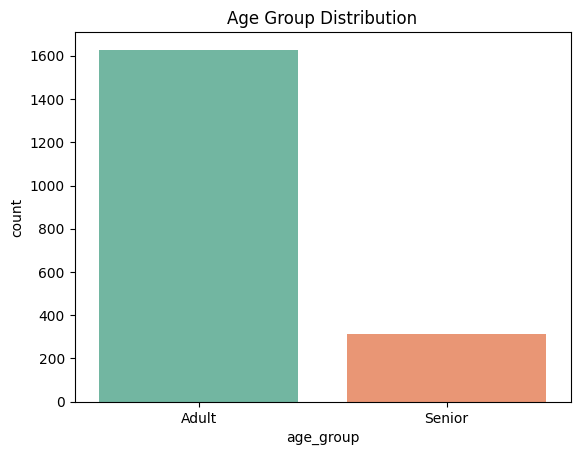

In [18]:
sns.countplot(x='age_group', data=train_df, hue = 'age_group', legend = False, palette='Set2')
plt.xticks([0, 1], ['Adult', 'Senior'])
plt.title('Age Group Distribution')
plt.show()

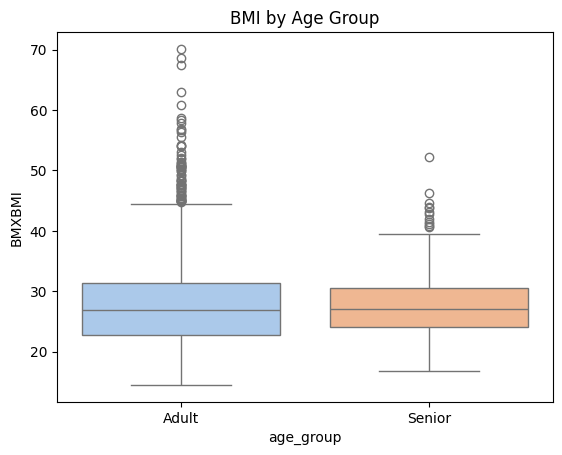

In [19]:
sns.boxplot(x='age_group', y='BMXBMI', data=train_df, hue = 'age_group', legend = False, palette='pastel' )
plt.xticks([0, 1], ['Adult', 'Senior'])
plt.title("BMI by Age Group")
plt.show()

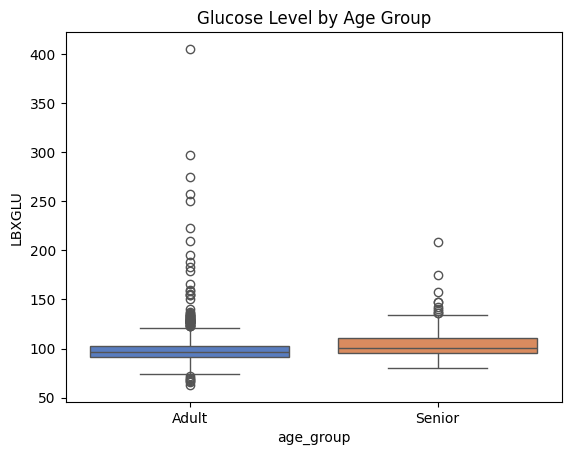

In [20]:
sns.boxplot(x='age_group', y='LBXGLU', data=train_df , hue = 'age_group', legend = False, palette='muted')
plt.xticks([0, 1], ['Adult', 'Senior'])
plt.title("Glucose Level by Age Group")
plt.show()

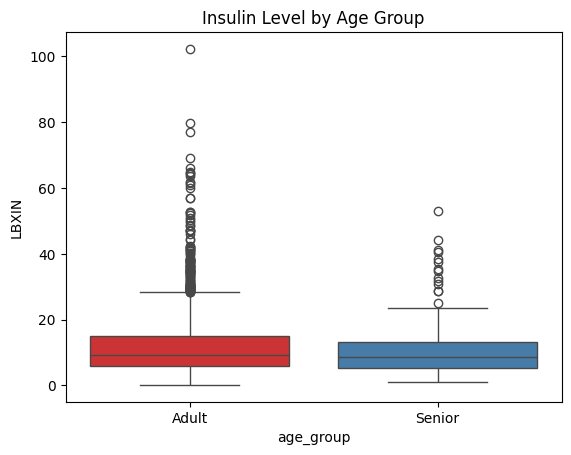

In [21]:
sns.boxplot(x='age_group', y='LBXIN', data=train_df , hue = 'age_group', legend = False, palette='Set1')
plt.xticks([0, 1], ['Adult', 'Senior'])
plt.title("Insulin Level by Age Group")
plt.show()

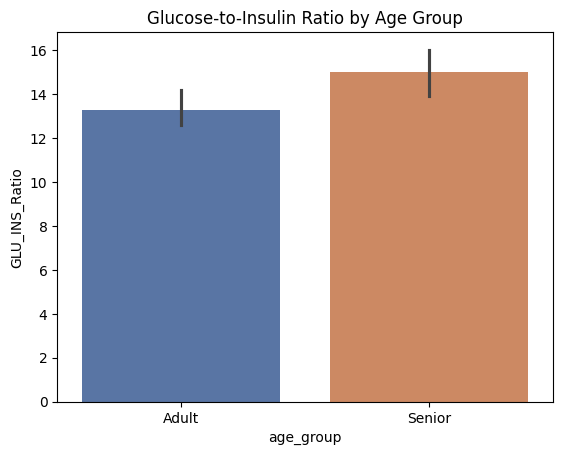

In [22]:
train_df['GLU_INS_Ratio'] = train_df['LBXGLU'] / (train_df['LBXIN'] + 1e-5)
test_df['GLU_INS_Ratio'] = test_df['LBXGLU'] / (test_df['LBXIN'] + 1e-5)
sns.barplot(x='age_group', y='GLU_INS_Ratio', data=train_df, hue = 'age_group', legend = False, palette='deep')
plt.title("Glucose-to-Insulin Ratio by Age Group")
plt.xticks([0, 1], ['Adult', 'Senior'])
plt.show()


In [23]:
bmi_bins = [0, 18.5, 25, 30, 40, 100]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese', 'Extremely Obese']

train_df['BMI_Category'] = pd.cut(train_df['BMXBMI'], bins=bmi_bins, labels=bmi_labels)
test_df['BMI_Category'] = pd.cut(test_df['BMXBMI'], bins=bmi_bins, labels=bmi_labels)

In [24]:
from sklearn.preprocessing import LabelEncoder
le_bmi = LabelEncoder()

train_df['BMI_Category'] = le_bmi.fit_transform(train_df['BMI_Category'])
test_df['BMI_Category'] = le_bmi.transform(test_df['BMI_Category'])

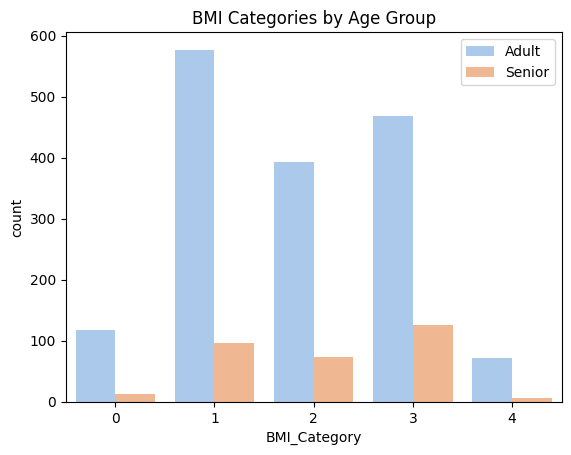

In [25]:
sns.countplot(x='BMI_Category', hue='age_group', data=train_df, palette='pastel')
plt.title("BMI Categories by Age Group")
plt.legend(labels=['Adult', 'Senior'])
plt.show()

In [26]:
train_df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,age_group,GLU_INS_Ratio,BMI_Category
0,73564.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91,0,7.377594,2
1,73568.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85,0,23.116823,1
2,73576.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14,0,14.495090,1
3,73577.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15,0,6.439624,3
4,73580.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92,0,9.432226,2


In [27]:

test_df.head()

,SEQN,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN,GLU_INS_Ratio,BMI_Category
0,77017.0,1.0,1.0,32.2,96.0,2.0,135.0,15.11,6.353404,2
1,75580.0,2.0,2.0,26.3,100.0,2.0,141.0,15.26,6.553076,3
2,73820.0,1.0,2.0,28.6,107.0,2.0,136.0,8.82,12.131506,3
3,80489.0,2.0,1.0,22.1,93.0,2.0,111.0,12.13,7.666935,1
4,82047.0,1.0,1.0,24.7,91.0,2.0,105.0,3.12,29.166573,1


In [28]:
X_train = train_df.drop(['age_group', 'SEQN'], axis=1)
y_train = train_df['age_group']

X_test = test_df.drop(['SEQN'], axis=1)

In [29]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

param_grid = {
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100],
    'learning_rate': [0.05, 0.1],
    'scale_pos_weight': [1, 3]
}

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=22)

grid = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='f1',
    cv=5,
    verbose=1,
    n_jobs=-1
)

grid.fit(X_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=22, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1], 'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100],
                         'scale_pos_weight': [1, 3]},
             scoring='f1', verbose=1)

In [30]:
print("Best Parameters:", grid.best_params_)

best_xgb = grid.best_estimator_

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100, 'scale_pos_weight': 3}


In [31]:
best_xgb.score(X_train, y_train)


0.831958762886598

Classification Report (Training Data):
              precision    recall  f1-score   support

       Adult       0.92      0.88      0.90      1628
      Senior       0.48      0.59      0.53       312

    accuracy                           0.83      1940
   macro avg       0.70      0.74      0.71      1940
weighted avg       0.85      0.83      0.84      1940



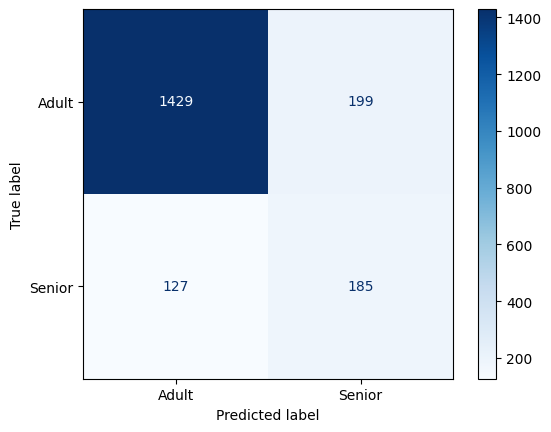

In [32]:
y_train_pred = best_xgb.predict(X_train)
print("Classification Report (Training Data):")
print(classification_report(y_train, y_train_pred, target_names=['Adult', 'Senior']))
ConfusionMatrixDisplay.from_estimator(best_xgb, X_train, y_train, display_labels=['Adult', 'Senior'], cmap='Blues')


In [33]:
y_test_pred = best_xgb.predict(X_test)

In [34]:
submission = pd.DataFrame({'age_group': y_test_pred})
submission

,age_group
0,0
1,1
2,1
3,0
4,0
...,...
307,0
308,0
309,0
310,0


In [35]:
submission['age_group'].value_counts()

,count
age_group,
0,259
1,53


In [36]:
submission.to_csv('submission.csv', index=False)